Import the necessary packages

In [1]:
from UQpy.SampleMethods import MCS
from UQpy.RunModel import RunModel
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp
import time

Define a Rosenbrock pdf (up to a scale factor) and draw samples from it using the component-wise Modified Metropolis Hanstings algorithm. For illustration purposes, we draw 15 samples with jump of 100,000 samples given the very long correlation length for the MMH on the Rosenbrock density. See Goodman and Weare, 2010.

In [2]:
t = time.time()
mu = 0.0254
sigma = 0.005
x = MCS(dimension=1, icdf=['Normal'], icdf_params=[[mu,sigma]], nsamples=20)
t_MCS = time.time()-t
print(t_MCS)
print(x.samples)

UQpy: Performing MCS design...
Done!
0.015032529830932617
[[0.02937485]
 [0.02264599]
 [0.01974517]
 [0.02688699]
 [0.02302285]
 [0.03188027]
 [0.03394173]
 [0.02840673]
 [0.03523907]
 [0.03515653]
 [0.02174257]
 [0.03459664]
 [0.02090845]
 [0.01293362]
 [0.01964656]
 [0.03242781]
 [0.01957417]
 [0.02204411]
 [0.0276948 ]
 [0.02928348]]


To run a third-party model, the sample points can be read from a text file or they can be directly passed into the RunModel class. In this example, the samples are saved as a text file 'UQpy_Samples.txt' and the RunModel class reads the values from this file.

In [3]:
np.savetxt('UQpy_Samples.txt', x.samples, fmt='%0.5f')

Run the model

In [4]:
t = time.time()
z = RunModel(cpu=1, model_type=None, model_script='UQpy_Model.py', input_script='UQpy_Input.py', output_script='UQpy_Output.py',
         dimension=1)
t_run = time.time()-t
print(t_run)


Evaluating the model...

1015.3231010437012


Observe how the data is stored.

In [5]:
print('Samples: \n',z.model_eval.samples)
print('Solutions: \n',z.model_eval.QOI)

Samples: 
 [[0.02937]
 [0.02265]
 [0.01975]
 [0.02689]
 [0.02302]
 [0.03188]
 [0.03394]
 [0.02841]
 [0.03524]
 [0.03516]
 [0.02174]
 [0.0346 ]
 [0.02091]
 [0.01293]
 [0.01965]
 [0.03243]
 [0.01957]
 [0.02204]
 [0.02769]
 [0.02928]]
Solutions: 
 [array(587.79), array(276.07), array(184.75), array(455.22), array(289.46), array(744.61), array(891.26), array(533.91), array(992.46), array(986.03), array(244.85), array(941.78), array(218.45), array(52.875), array(182.01), array(782.15), array(179.84), array(254.87), array(495.64), array(582.6)]


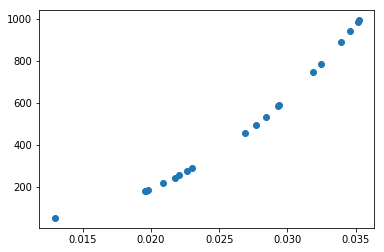

In [6]:
plt.plot(z.model_eval.samples,z.model_eval.QOI,'o')